In [0]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow
from tensorflow.keras.utils import get_file

In [0]:
link = 'https://sid.erda.dk/public/archives/ff17dc924eba88d5d01a807357d6614c/TrainIJCNN2013.zip'

In [4]:
my_data = get_file('data', link)
my_data

1104183296/1104177081 [==============================] - 39s 0us/step


'/root/.keras/datasets/data'

In [0]:
!unzip ../root/.keras/datasets/data

In [0]:
ls TrainIJCNN2013

In [0]:
link = './TrainIJCNN2013'
folders = [os.path.join(link, f) for f in os.listdir(link) if os.path.isdir(os.path.join(link, f))]
folders

In [0]:
def get_data(folders, size=(30,30)):
  X = []
  y = []
  for folder in folders:
    label = folder[-2:]
    for f in os.listdir(folder):
      img = cv2.imread(os.path.join(folder, f))
      img = cv2.resize(img, size, interpolation=cv2.INTER_AREA)
      X.append(img)
      y.append(int(label))
  return np.array(X).reshape(-1, size[0],size[1],3), np.array(y).reshape(-1)

In [0]:
X, y = get_data(folders)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
len(set(y_test))

35

In [0]:
labels_map = {
  0: "speed limit 20 (prohibitory)",
  1 : "speed limit 30 (prohibitory)",
  2 : "speed limit 50 (prohibitory)",
  3 : "speed limit 60 (prohibitory)",
  4 : "speed limit 70 (prohibitory)",
  5 : "speed limit 80 (prohibitory)",
  6 : "restriction ends 80 (other)",
  7 : "speed limit 100 (prohibitory)",
  8 : "speed limit 120 (prohibitory)",
  9 : "no overtaking (prohibitory)",
  10 : "no overtaking (trucks) (prohibitory)",
  11 : "priority at next intersection (danger)",
  12 : "priority road (other)",
  13 : "give way (other)",
  14 : "stop (other)",
  15 : "no traffic both ways (prohibitory)",
  16 : "no trucks (prohibitory)",
  17 : "no entry (other)",
  18 : "danger (danger)",
  19 : "bend left (danger)",
  20 : "bend right (danger)",
  21 : "bend (danger)",
  22 : "uneven road (danger)",
  23 : "slippery road (danger)",
  24 : "road narrows (danger)",
  25 : "construction (danger)",
  26 : "traffic signal (danger)",
  27 : "pedestrian crossing (danger)",
  28 : "school crossing (danger)",
  29 : "cycles crossing (danger)",
  30 : "snow (danger)",
  31 : "animals (danger)",
  32 : "restriction ends (other)",
  33 : "go right (mandatory)",
  34 : "go left (mandatory)",
  35 : "go straight (mandatory)",
  36 : "go right or straight (mandatory)",
  37 : "go left or straight (mandatory)",
  38 : "keep right (mandatory)",
  39 : "keep left (mandatory)",
  40 : "roundabout (mandatory)",
  41 : "restriction ends (overtaking)",
  42 : "restriction ends (overtaking (trucks))",
}

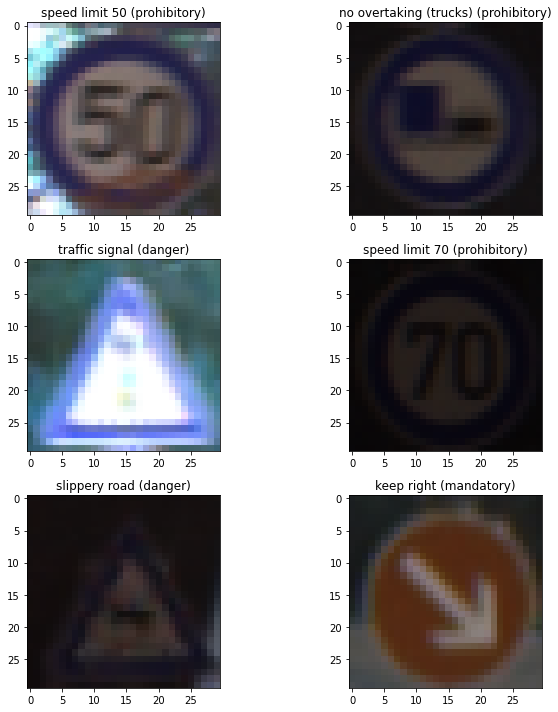

In [15]:
fig, ax = plt.subplots(3,2)
fig.set_size_inches(10,10)
for i in range(3):
  for j in range(2):
    ids = np.random.randint(len(X_train))
    ax[i,j].imshow(X_train[ids])
    ax[i,j].set_title(labels_map[y_train[ids]])
plt.tight_layout()

In [0]:
X_train = X_train / 255
X_test = X_test / 255

In [106]:
print(X_train.shape)
print(y_train.shape)

(682, 30, 30, 3)
(682,)


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

In [0]:
models = Sequential([
# models.add(Flatten(input_shape=(30, 30, 3)))
# # models.add(Dense(1024, activation='relu'))
# # models.add(Dense(512, activation='relu'))
# # models.add(Dense(256, activation='relu'))
# # models.add(Dense(64, activation='relu'))
# # models.add(Dense(43))
# models.add(Dense(128, activation='relu'))
# # models.add(Dropout(0.2))
# models.add(Dense(43))
  tf.keras.layers.Flatten(input_shape=(30,30,3)),
  tf.keras.layers.Dense(512, activation='relu'),

  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(43)
])

In [89]:
models.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_13 (Flatten)         (None, 2700)              0         
_________________________________________________________________
dense_37 (Dense)             (None, 512)               1382912   
_________________________________________________________________
dense_38 (Dense)             (None, 128)               65664     
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 43)                5547      
Total params: 1,454,123
Trainable params: 1,454,123
Non-trainable params: 0
_________________________________________________________________


In [0]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, )
models.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'], )

In [107]:
callBack = EarlyStopping(monitor='val_loss', patience=15, verbose=1)
models.fit(X_train, y_train, batch_size=32, epochs=40, callBack=callBack, validation_split=0.2)


Epoch 1/40
18/18 [==============================] - 0s 12ms/step - loss: 0.0474 - accuracy: 0.9927 - val_loss: 1.5447 - val_accuracy: 0.7518
Epoch 2/40
18/18 [==============================] - 0s 13ms/step - loss: 0.0528 - accuracy: 0.9817 - val_loss: 1.2317 - val_accuracy: 0.7737
Epoch 3/40
18/18 [==============================] - 0s 13ms/step - loss: 0.0337 - accuracy: 0.9963 - val_loss: 1.3329 - val_accuracy: 0.7956
Epoch 4/40
18/18 [==============================] - 0s 12ms/step - loss: 0.0224 - accuracy: 0.9927 - val_loss: 1.3250 - val_accuracy: 0.8029
Epoch 5/40
18/18 [==============================] - 0s 12ms/step - loss: 0.0379 - accuracy: 0.9945 - val_loss: 1.5715 - val_accuracy: 0.7664
Epoch 6/40
18/18 [==============================] - 0s 13ms/step - loss: 0.0304 - accuracy: 0.9927 - val_loss: 1.2770 - val_accuracy: 0.8175
Epoch 7/40
18/18 [==============================] - 0s 13ms/step - loss: 0.0230 - accuracy: 0.9963 - val_loss: 1.5186 - val_accuracy: 0.7883
Epoch 8/40
18